# Unweighted Grammar

This notebook uses the weights generated in the notebook `GrammarGenerator` to generate sample levels. It isn't meant to generate great levels, just a testbed to see how things can progress.

In [1]:
PATH_GRAMMAR_1 = 'grammar/1_grammar.json'
PATH_GRAMMAR_2 = 'grammar/2_grammar.json'
PATH_GRAMMAR_3 = 'grammar/3_grammar.json'
PATH_GRAMMAR_4 = 'grammar/4_grammar.json'
PATH_GRAMMAR_5 = 'grammar/5_grammar.json'

grammar_paths = [PATH_GRAMMAR_1, PATH_GRAMMAR_2, PATH_GRAMMAR_3, PATH_GRAMMAR_4, PATH_GRAMMAR_5]

In [2]:
from map_generation import generate_image
from IPython.display import Image
from grammar import GenerateMap
from datetime import datetime
import json
import os

In [3]:
f = open('grammar/grammar_values/grammar.json', 'r')
grammar_to_col = json.loads(f.read())
f.close()

In [4]:
MIN_MAP_LENGTH = 200

In [5]:
for i in range(len(grammar_paths)):
    grammar_size = i+1
    f = open('grammar/original_grammars//%i_grammar.json' % (grammar_size), 'r')
    grammar = json.loads(f.read())
    f.close()
    
    map_grammar = GenerateMap.generate_map_unweighted(grammar, datetime.now(), MIN_MAP_LENGTH)
    map_text = GenerateMap.convert_grammar_array_to_map(map_grammar, grammar_to_col)
    generate_image.convert_map(map_text, display=False, save_path='temp_map%i.png' % (i))

### 1 Length Grammar

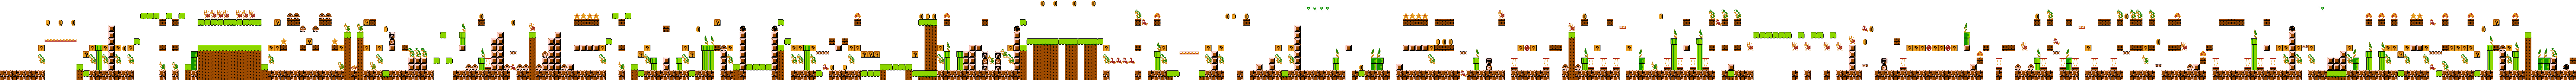

In [6]:
Image(filename='temp_map0.png')

### 2 length Grammar

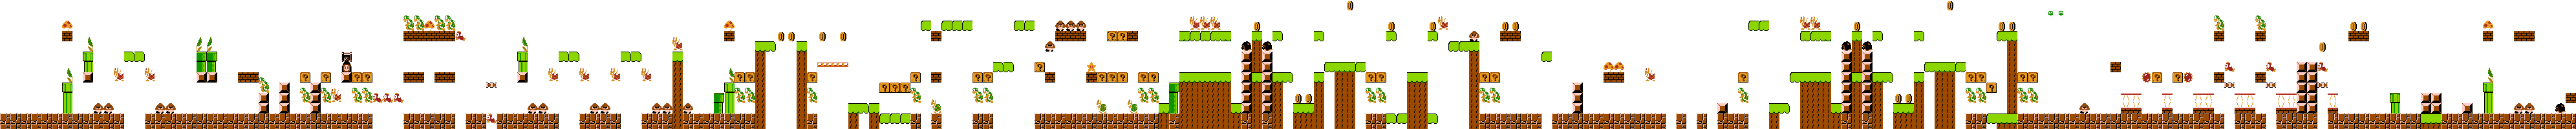

In [7]:
Image(filename='temp_map1.png')

### 3 Length Grammar

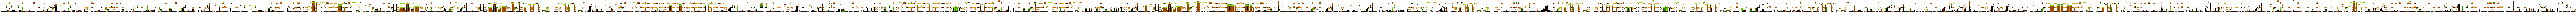

In [8]:
Image(filename='temp_map2.png')

### 4 Length Grammar

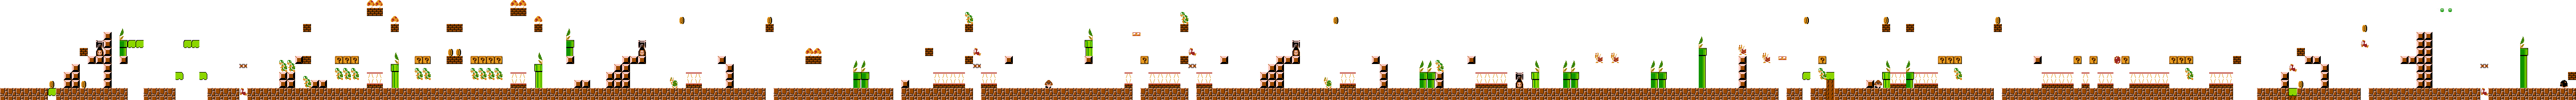

In [9]:
Image(filename='temp_map3.png')

### 5 Length Grammar

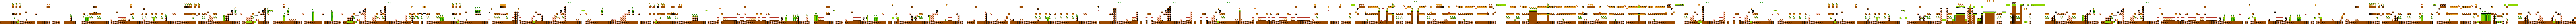

In [10]:
Image(filename='temp_map4.png')

After generation of images, delete them.

In [11]:
os.remove('temp_map0.png')
os.remove('temp_map1.png')
os.remove('temp_map2.png')
os.remove('temp_map3.png')
os.remove('temp_map4.png')